#### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data

Source <a href='https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset'>here</a>.

"cnt" - the count of a new bike shares<br/>
"t1" - real temperature in C<br/>
"t2" - temperature in C "feels like"<br/>
"hum" - humidity in percentage<br/>
"wind_speed" - wind speed in km/h<br/>
"weather_code" - category of the weather<br/>
"is_holiday" - boolean field - 1 holiday / 0 non holiday<br/>
"is_weekend" - boolean field - 1 if the day is weekend<br/>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br/>
"weathe_code" category description:<br/>
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br/>
- 2 = scattered clouds / few clouds<br/>
- 3 = Broken clouds<br/>
- 4 = Cloudy<br/>
- 7 = Rain/ light Rain shower/ Light rain<br/>
- 10 = rain with thunderstorm<br/>
- 26 = snowfall<br/>
- 94 = Freezing Fog<br/>

In [6]:
data = pd.read_csv("data/london_bikes.csv")
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Scatter plot

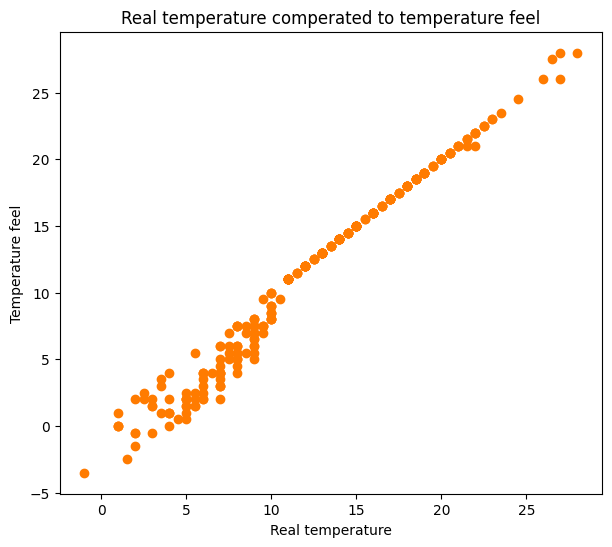

In [16]:
subset = data.sample(300)
plt.figure(figsize=(7, 6))
plt.scatter(subset.t1, subset.t2, color='#ff7b00')
plt.title("Real temperature comperated to temperature feel")
plt.xlabel("Real temperature")
plt.ylabel("Temperature feel")
plt.show()

# Bubble plot

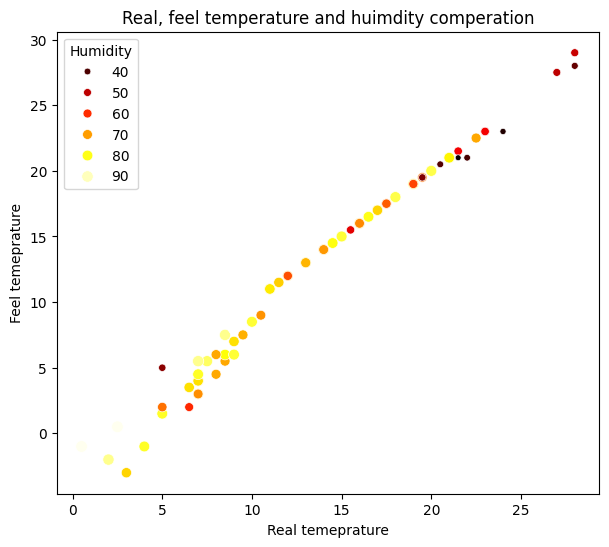

In [32]:
subset = data.sample(100)
subset.rename(columns={
    't1':'Real temeprature',
    't2':'Feel temeprature',
    'hum':'Humidity'
}, inplace=True)
plt.figure(figsize=(7, 6))
sns.scatterplot(
    subset,
    x='Real temeprature', y='Feel temeprature',
    size='Humidity', hue='Humidity',
    palette='hot'
)
plt.title("Real, feel temperature and huimdity comperation")
plt.show()

# 2D density plot

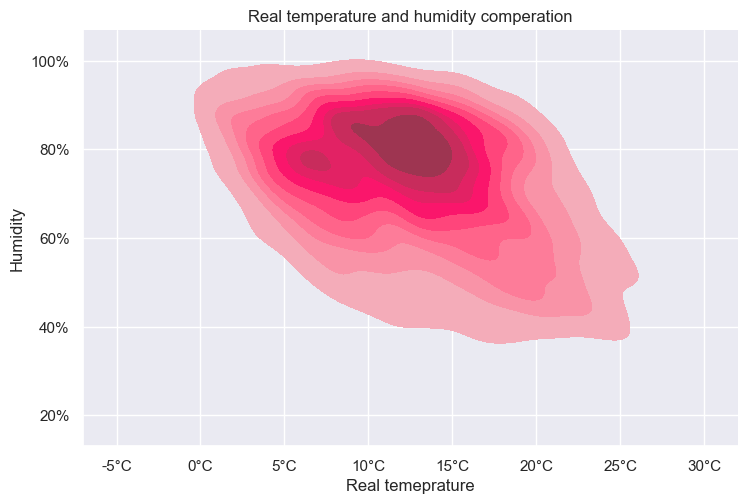

In [39]:
sns.set(rc = {'figure.figsize': (10, 7.5)})
sns.displot(data=data, x='t1', y='hum', kind='kde', height=5, aspect=1.5, color='pink', fill=True)
plt.yticks(np.arange(20, 101, 20), [f"{hum}%" for hum in np.arange(20, 101, 20)])
plt.xticks(np.arange(-5, 31, 5), [f"{temp}°C" for temp in np.arange(-5, 31, 5)])
plt.xlim(-7, 32)
plt.ylim(13, 107)
plt.title("Real temperature and humidity comperation")
plt.xlabel("Real temeprature")
plt.ylabel("Humidity")
plt.show()

# Heatmap for correllation

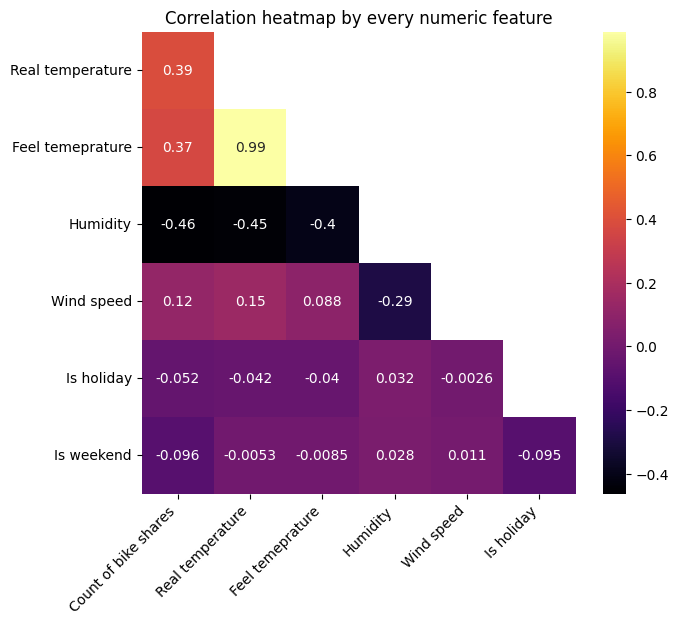

In [56]:
plt.style.use('default')
corr = data.drop(['weather_code', 'season'], axis=1).select_dtypes(include=np.number).corr()
corr.drop(['cnt'], axis=0, inplace=True)
corr.drop(['is_weekend'], axis=1, inplace=True)
change = {
    't1':'Real temperature', 't2':'Feel temeprature', 'hum':'Humidity',
    'wind_speed':'Wind speed', 'is_holiday':'Is holiday',
    'is_weekend':'Is weekend', 'cnt':'Count of bike shares'
}
corr.rename(index=change, columns=change, inplace=True)

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr, annot=True, cmap='inferno',
    mask=np.triu(np.ones_like(corr))-np.identity(len(corr))
)
plt.title("Correlation heatmap by every numeric feature")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.show()

# PCA - Principal Components analysis (dimensions reduction)

# Line plot

In [123]:
subset = data[['timestamp', 't1', 'hum']].copy()
subset.timestamp = pd.to_datetime(subset.timestamp)
date = []
temp = []
humiditi = []

def addToStorage(year, dayOfYear):
    date.append(
        subset[(subset.timestamp.dt.year == year) & (subset.timestamp.dt.dayofyear == dayOfYear)]\
        .loc[0, 'timestamp'].date()
    )
    temp.append(np.mean(
        subset[(subset.timestamp.dt.year == year) & (subset.timestamp.dt.dayofyear == dayOfYear)].t1
    ))
    humiditi.append(np.mean(
        subset[(subset.timestamp.dt.year == year) & (subset.timestamp.dt.dayofyear == dayOfYear)].hum
    ))

# 2015
for day in range(subset.loc[0, 'timestamp'].dayofyear, 365+1):
    addToStorage(2015, day)

# 2016
for day in range(1, 366+1):
    addToStorage(2016, day)

# 2017
for day in range(1, subset.loc[-1, 'timestamp'].dayfyear+1):
    addToStorage(2017, day)

subset = pd.DataFrame({
    'Date':date,
    'Temp':temp,
    'Humidity':humiditi
})

subset

KeyError: 0

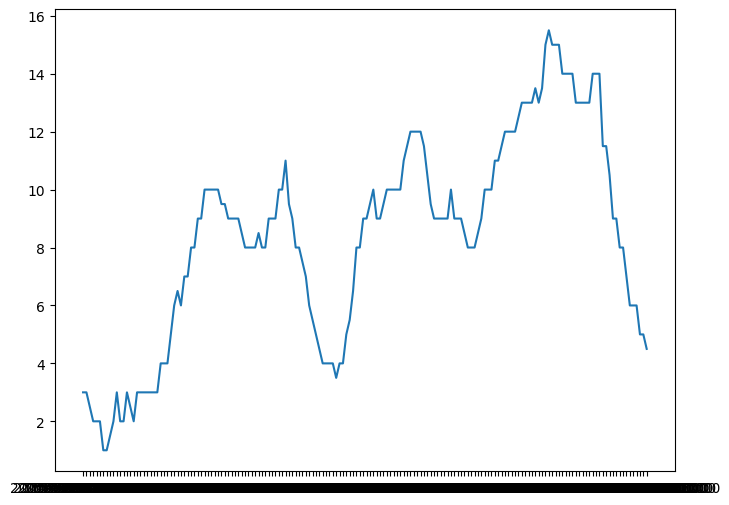

In [61]:
subset = data.head(168)
plt.figure(figsize=(8, 6))
plt.plot(subset.timestamp, subset.t1)
plt.show()

# Area plot

# Line plot for two axis and time series

# Linear regression

# Averaging trends

# Deleting trends